In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os as os
import statistics

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 250
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 2})
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

In [35]:
anime_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','anime.csv')
ratings1_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','rating1.csv')
ratings2_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','rating2.csv')

In [36]:
anime_dataset = pd.read_csv(anime_datapath)
anime_dataset

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [37]:
rating1= pd.read_csv(ratings1_datapath)
rating2= pd.read_csv(ratings2_datapath)

In [38]:
rating_data = pd.concat([rating1, rating2],axis=0)
rating_data.reset_index(inplace=True)

rating_data

,index,user_id,anime_id,rating
0,0,1,20,-1
1,1,1,24,-1
2,2,1,79,-1
3,3,1,226,-1
4,4,1,241,-1
...,...,...,...,...
7813732,3906864,73515,16512,7
7813733,3906865,73515,17187,9
7813734,3906866,73515,22145,10
7813735,3906867,73516,790,9


In [39]:
anime_dataset[["rating", "members"]].describe()

,rating,members
count,12064.000000,1.229400e+04
mean,6.473902,1.807134e+04
std,1.026746,5.482068e+04
min,1.670000,5.000000e+00
25%,5.880000,2.250000e+02
50%,6.570000,1.550000e+03
75%,7.180000,9.437000e+03
max,10.000000,1.013917e+06


In [40]:
unique_names = anime_dataset["name"].unique()



print(unique_names[:100])

['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°'
 'Steins;Gate' 'Gintama&#039;'
 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou'
 'Hunter x Hunter (2011)' 'Ginga Eiyuu Densetsu'
 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare'
 'Gintama&#039;: Enchousen' 'Clannad: After Story' 'Koe no Katachi'
 'Gintama' 'Code Geass: Hangyaku no Lelouch R2' 'Haikyuu!! Second Season'
 'Sen to Chihiro no Kamikakushi' 'Shigatsu wa Kimi no Uso'
 'Mushishi Zoku Shou 2nd Season' 'Ookami Kodomo no Ame to Yuki'
 'Code Geass: Hangyaku no Lelouch' 'Hajime no Ippo'
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen' 'Cowboy Bebop'
 'One Punch Man' 'Mononoke Hime' 'Suzumiya Haruhi no Shoushitsu'
 'Monogatari Series: Second Season' 'Mushishi Zoku Shou' 'Mushishi'
 'Tengen Toppa Gurren Lagann' 'Great Teacher Onizuka'
 'Natsume Yuujinchou Go' 'Hajime no Ippo: New Challenger'
 'Mushishi Zoku Shou: Suzu no Shizuku' 'Natsume Yuujinchou Shi'
 'Howl no Ugoku Shiro' 'Fate/Zero 2nd Seas

In [41]:
# Quantile function

def q25(x):

    return x.quantile(0.25)



def q75(x):

    return x.quantile(0.75)

# Simple descriptive statistic

anime_dataset.groupby('type')["rating"] \
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max']) \
    .transpose()

type,Movie,Music,ONA,OVA,Special,TV
mean,6.318058,5.588996,5.643298,6.375221,6.523501,6.902299
std,1.211988,0.958440,1.127091,0.858358,0.887762,0.863526
min,1.920000,3.280000,2.580000,2.000000,1.670000,2.670000
q25,5.420000,5.010000,4.870000,5.850000,6.085000,6.440000
median,6.470000,5.625000,5.755000,6.380000,6.630000,6.940000
q75,7.250000,6.152500,6.412500,6.920000,7.110000,7.460000
max,10.000000,8.380000,8.260000,9.250000,8.660000,9.600000


In [42]:
#remove rating -1

ratings = rating_data[rating_data["rating"] != -1]

ratings.groupby(["rating"])["rating"].count()

rating
1       16649
2       23150
3       41453
4      104291
5      282806
6      637775
7     1375287
8     1646019
9     1254096
10     955715
Name: rating, dtype: int64

There are 7813737 rating posted.
From total 73515 unique user id.
And rate total 12294 different animes.


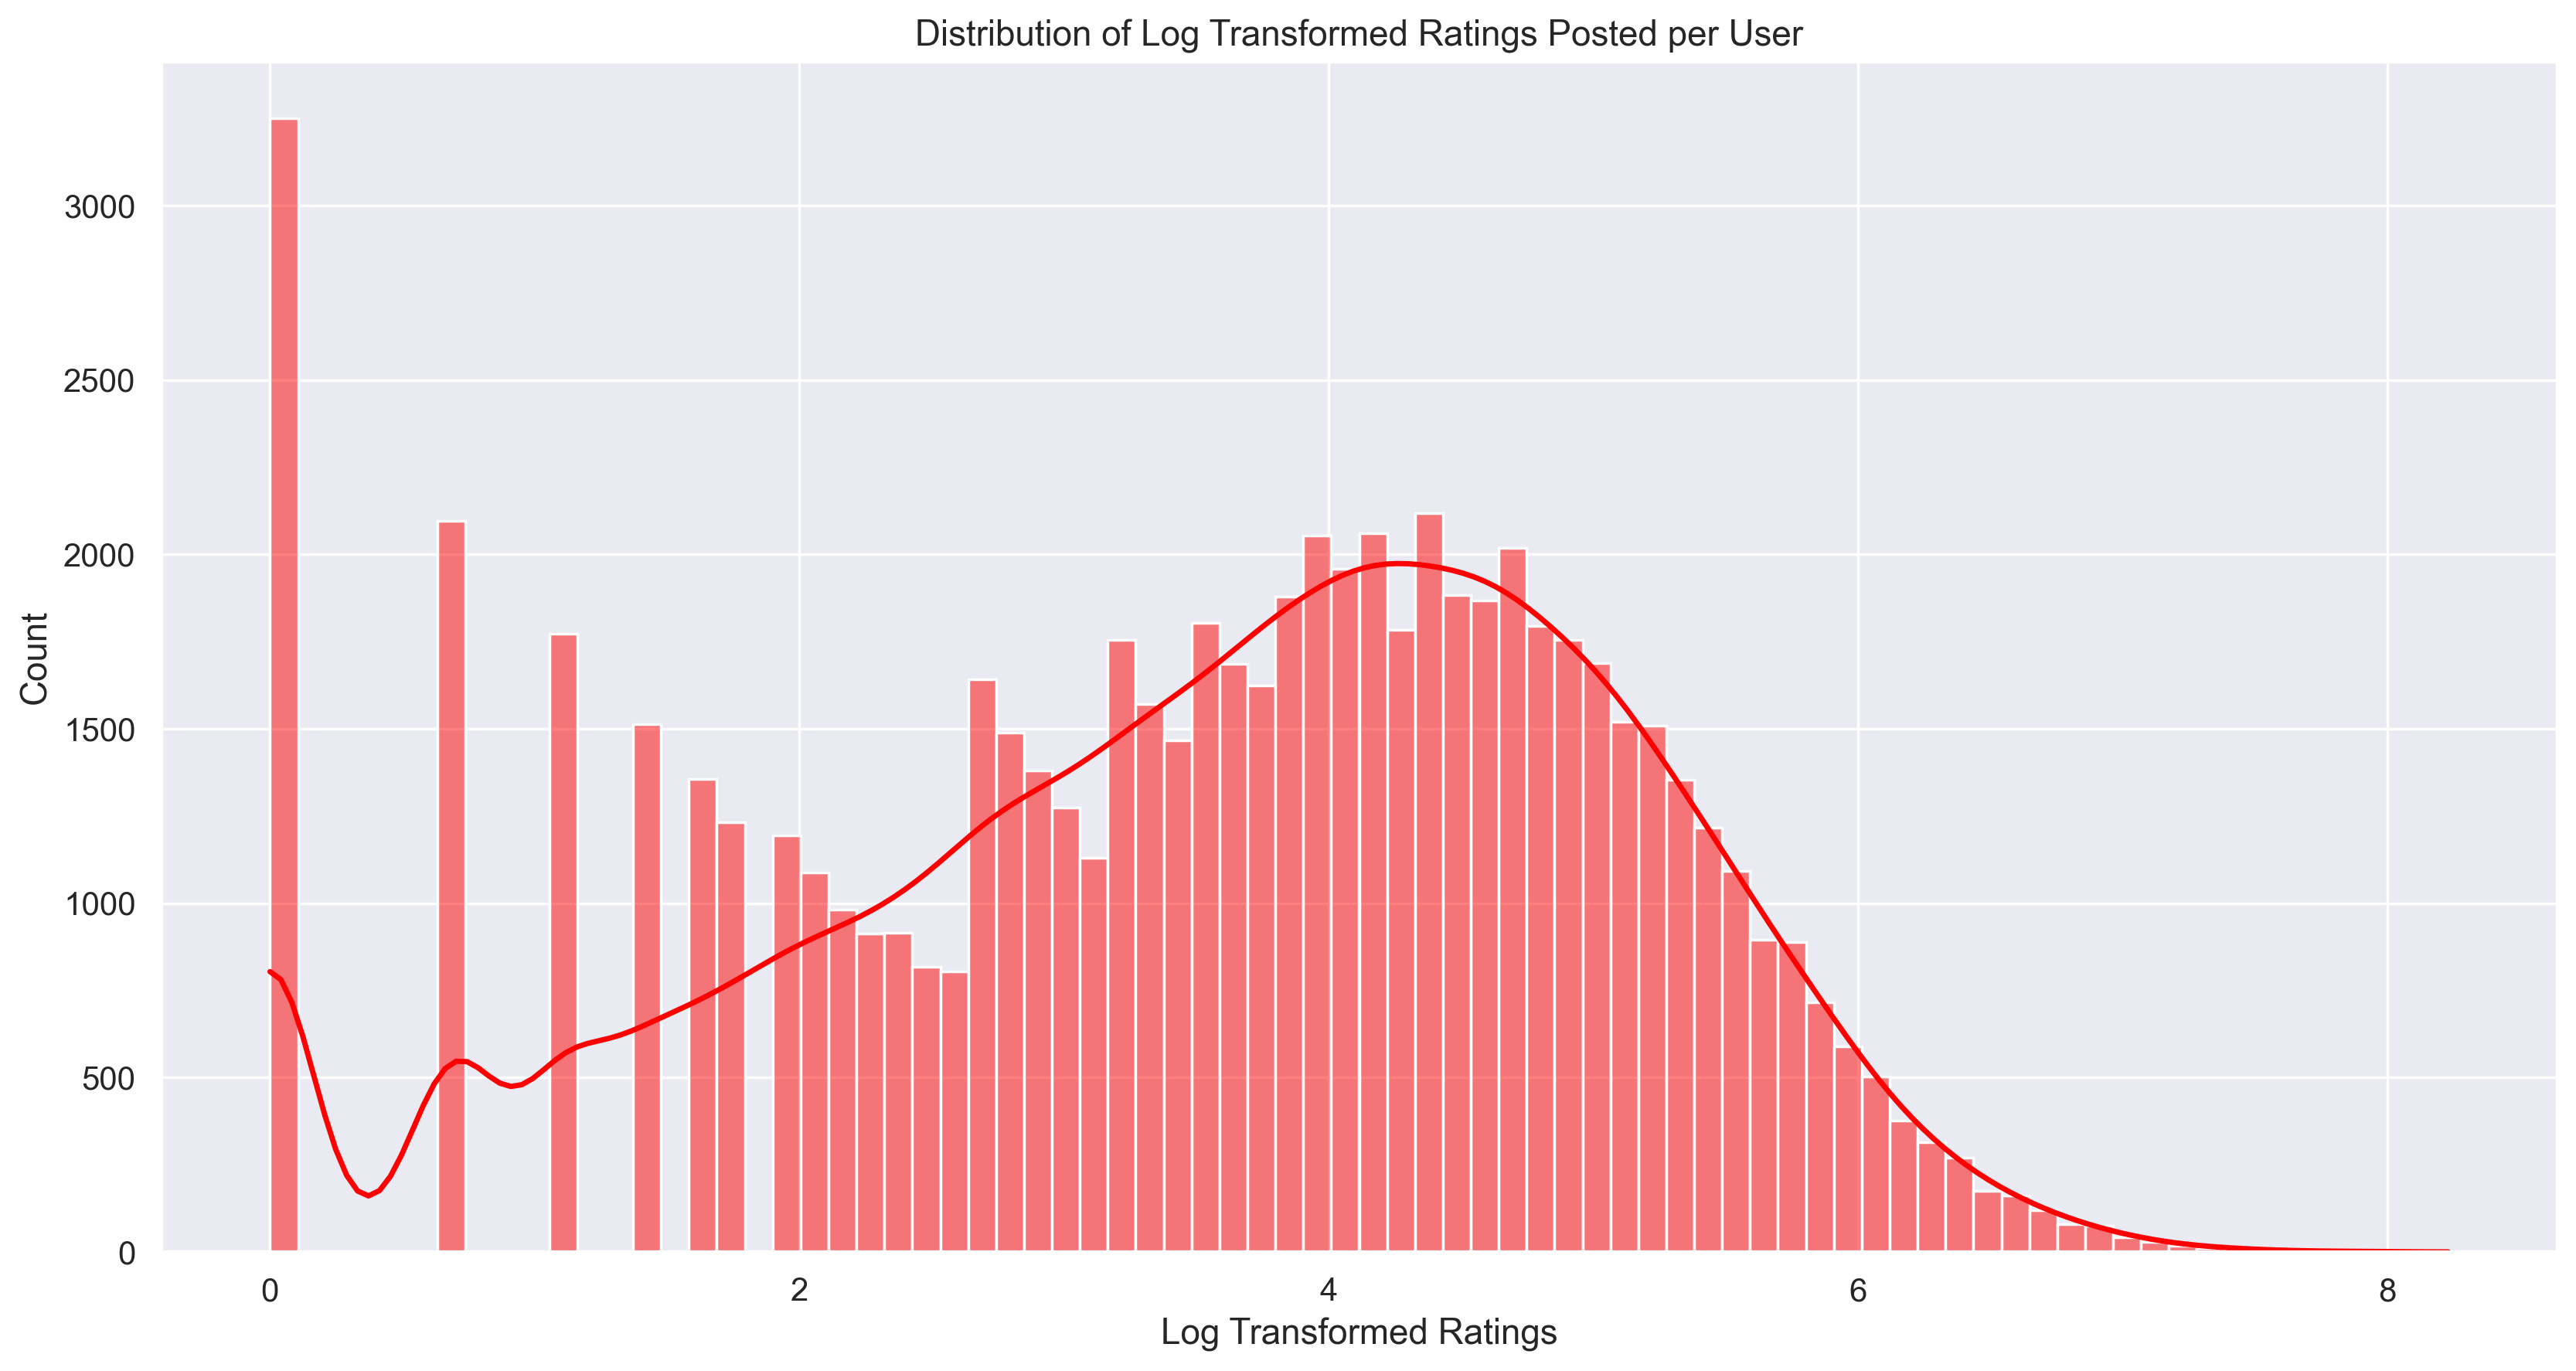

In [60]:
# number of ratings

print("There are", str(len(rating_data)), "rating posted.")

# number of unique users

print("From total", str(len(rating_data['user_id'].unique())), "unique user id.")

#number of unique animes (in anime list, not ratings)

print("And rate total", str(len(anime_dataset['anime_id'].unique())), "different animes.")

# avg number of anime rated per user

ratings_per_user = ratings.groupby('user_id')['rating'].count()

statistics.mean(ratings_per_user.tolist())

# distribution of ratings posted per user

plt.title('Distribution of Log Transformed Ratings Posted per User')
plt.xlabel("Log Transformed Ratings")

sns.histplot(x=np.log(ratings_per_user),kde=True,color='red')

plt.show()

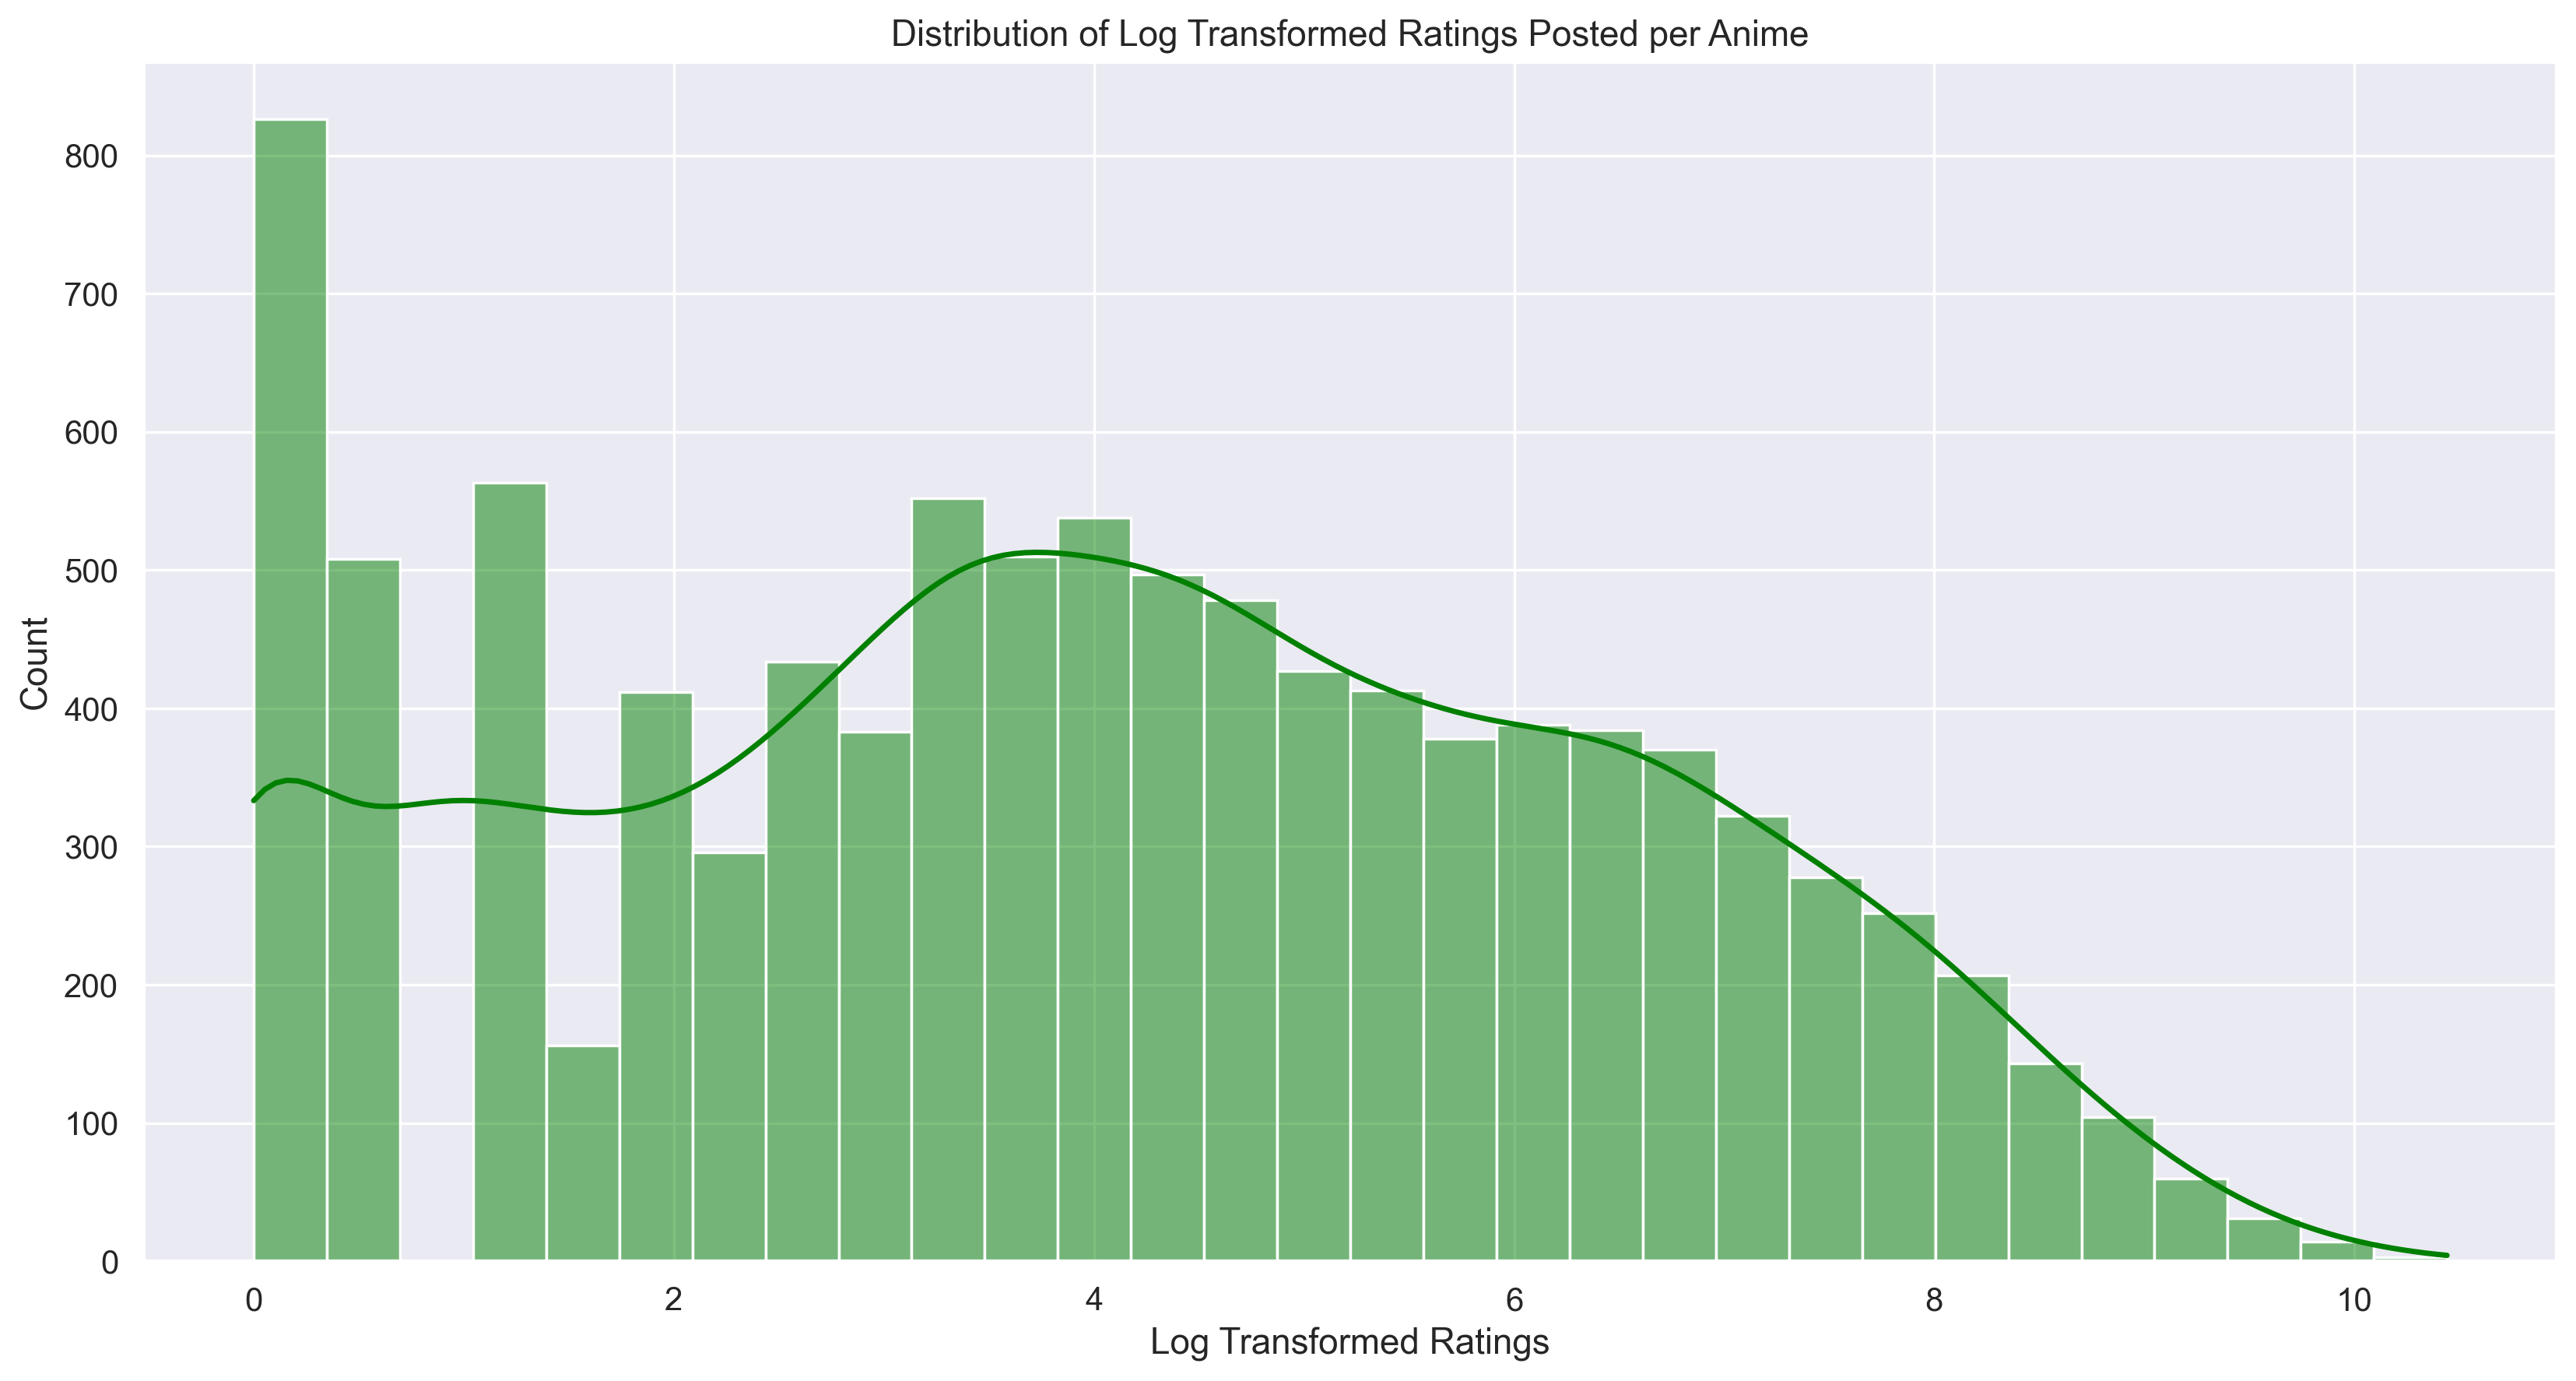

In [58]:
# avg number of ratings given per anime

ratings_per_anime = ratings.groupby('anime_id')['rating'].count()

statistics.mean(ratings_per_anime.tolist())



# distribution of ratings per anime

plt.title('Distribution of Log Transformed Ratings Posted per Anime')
plt.xlabel("Log Transformed Ratings")

sns.histplot(x=np.log(ratings_per_anime),kde=True,color='green')

plt.show()

In [45]:
# counts of ratings per anime as a df

ratings_per_anime_df = pd.DataFrame(ratings_per_anime)

# remove if < 1000 ratings

filtered_rating_per_anime_df = ratings_per_anime_df[ratings_per_anime_df['rating'] >= 1000]

# build a list of anime_ids to keep

popular_anime = filtered_rating_per_anime_df.index.tolist()

popular_anime

[1,
 5,
 6,
 7,
 15,
 16,
 18,
 19,
 20,
 22,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 71,
 72,
 73,
 74,
 76,
 77,
 79,
 80,
 81,
 90,
 91,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 104,
 109,
 114,
 119,
 120,
 121,
 122,
 123,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 153,
 154,
 155,
 156,
 157,
 160,
 161,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 174,
 177,
 180,
 181,
 182,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 195,
 196,
 198,
 199,
 202,
 205,
 208,
 209,
 210,
 223,
 225,
 226,
 227,
 228,
 232,
 237,
 238,
 239,
 240,
 241,
 243,
 245,
 246,
 248,
 249,
 250,
 251,
 256,
 257,
 263,
 264,
 265,
 267,
 268,
 269,
 270,
 272,
 274,
 276,
 288,
 297,
 298,
 304,
 306,
 317,
 320,
 322,
 323,
 325,
 326,
 329,
 330,
 339,
 341,
 343,
 355,
 356,
 357,
 368,
 371,
 372,
 376,
 379,
 3

In [46]:
len(popular_anime)

1462

In [47]:
# counts ratings per user as a df

ratings_per_user_df = pd.DataFrame(ratings_per_user)



# remove if < 500

filtered_rating_per_user_df = ratings_per_user_df[ratings_per_user_df['rating'] >= 500]



# build a list of user_ids to keep

profilic_users = filtered_rating_per_user_df.index.tolist()

In [48]:
len(profilic_users)

1365

In [49]:
filtered_ratings = ratings[ratings.anime_id.isin(popular_anime)]

filtered_ratings = ratings[ratings.user_id.isin(profilic_users)]

len(filtered_ratings)

1005314

In [50]:
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')

In [51]:
# replace NaN values with 0

rating_matrix = rating_matrix.fillna(0)

# display the top few rows

rating_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
from sklearn.metrics.pairwise import cosine_similarity

import operator



def similar_users(user_id, matrix, k=3):

    # create a df of just the current user

    user = matrix[matrix.index == user_id] #user 1

    #and a df of all other users

    other_users = matrix[matrix.index != user_id] #user 2


    # calc cosine similarity between user and each other user

    similarities = cosine_similarity(user, other_users)[0].tolist()

    # create list of indices of these users

    indices = other_users.index.tolist()

    # create key/values pairs of user index and their similarity

    index_similarity = dict(zip(indices, similarities))

    # sort by similarity

    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))

    index_similarity_sorted.reverse()

    # grab k users off the top k 3 , karena k diatas kita set k=3

    top_users_similarities = index_similarity_sorted[:k]

    users = [u[0] for u in top_users_similarities]



    return users



current_user = 226
# try it out

similar_user_indices = similar_users(current_user, rating_matrix)

print(similar_user_indices)

[30773, 39021, 45603]


In [53]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):

    # load vectors for similar users

    similar_users = matrix[matrix.index.isin(similar_user_indices)] #compare current user with similar users

    # calc avg ratings across the 3 similar users
    similar_users = similar_users.mean(axis=0)

    # convert to dataframe so its easy to sort and filter

    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])

    # load vector for the current user

    user_df = matrix[matrix.index == user_index]

    # transpose it so its easier to filter

    user_df_transposed = user_df.transpose()

    # rename the column as 'rating'

    user_df_transposed.columns = ['rating']

    # remove any rows with a 0 value. Anime not watched yet

    user_df_transposed = user_df_transposed[user_df_transposed['rating'] == 0]

    # generate a list of animes the user has not seen

    animes_unseen = user_df_transposed.index.tolist()

    # filter avg ratings of similar users for only anime the current user has not seen

    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(animes_unseen)]

    # order the dataframe

    similar_users_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
    # grab the top n anime , top n dari variabel items = 5 diatas

    top_n_anime = similar_users_ordered.head(items)

    top_n_anime_indices = top_n_anime.index.tolist()

    # lookup these anime in the other dataframe to find names

    anime_information = anime_dataset[anime_dataset.anime_id.isin(top_n_anime_indices)]

    return anime_information #items

# try it out

recommend_item(226, similar_user_indices, rating_matrix)

,anime_id,name,genre,type,episodes,rating,members
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
39,12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620
87,10030,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.53,151561
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
184,7674,Bakuman.,"Comedy, Romance, Shounen",TV,25,8.35,246899


In [54]:
# try it out

recommend_item(271, similar_user_indices, rating_matrix)


    

,anime_id,name,genre,type,episodes,rating,members
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
39,12365,Bakuman. 3rd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.71,133620
87,10030,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",TV,25,8.53,151561
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
184,7674,Bakuman.,"Comedy, Romance, Shounen",TV,25,8.35,246899


In [55]:
rating_data.head()

,index,user_id,anime_id,rating
0,0,1,20,-1
1,1,1,24,-1
2,2,1,79,-1
3,3,1,226,-1
4,4,1,241,-1


      anime_id                                name  \
6296     12393                          Oyako Club   
929       2471                     Doraemon (1979)   
9243     23349              Kirin Monoshiri Yakata   
5360      6277  Manga Nippon Mukashibanashi (1976)   
6580      8213                    Hoka Hoka Kazoku   

                                                  genre type  episodes  \
6296                              Comedy, Slice of Life   TV      1818   
929   Adventure, Comedy, Fantasy, Kids, Sci-Fi, Shounen   TV      1787   
9243                                               Kids   TV      1565   
5360                                Fantasy, Historical   TV      1471   
6580                                             Comedy   TV      1428   

      rating  members  
6296    6.18      160  
929     7.76    14233  
9243    5.56      116  
5360    6.48      406  
6580    6.05      194  


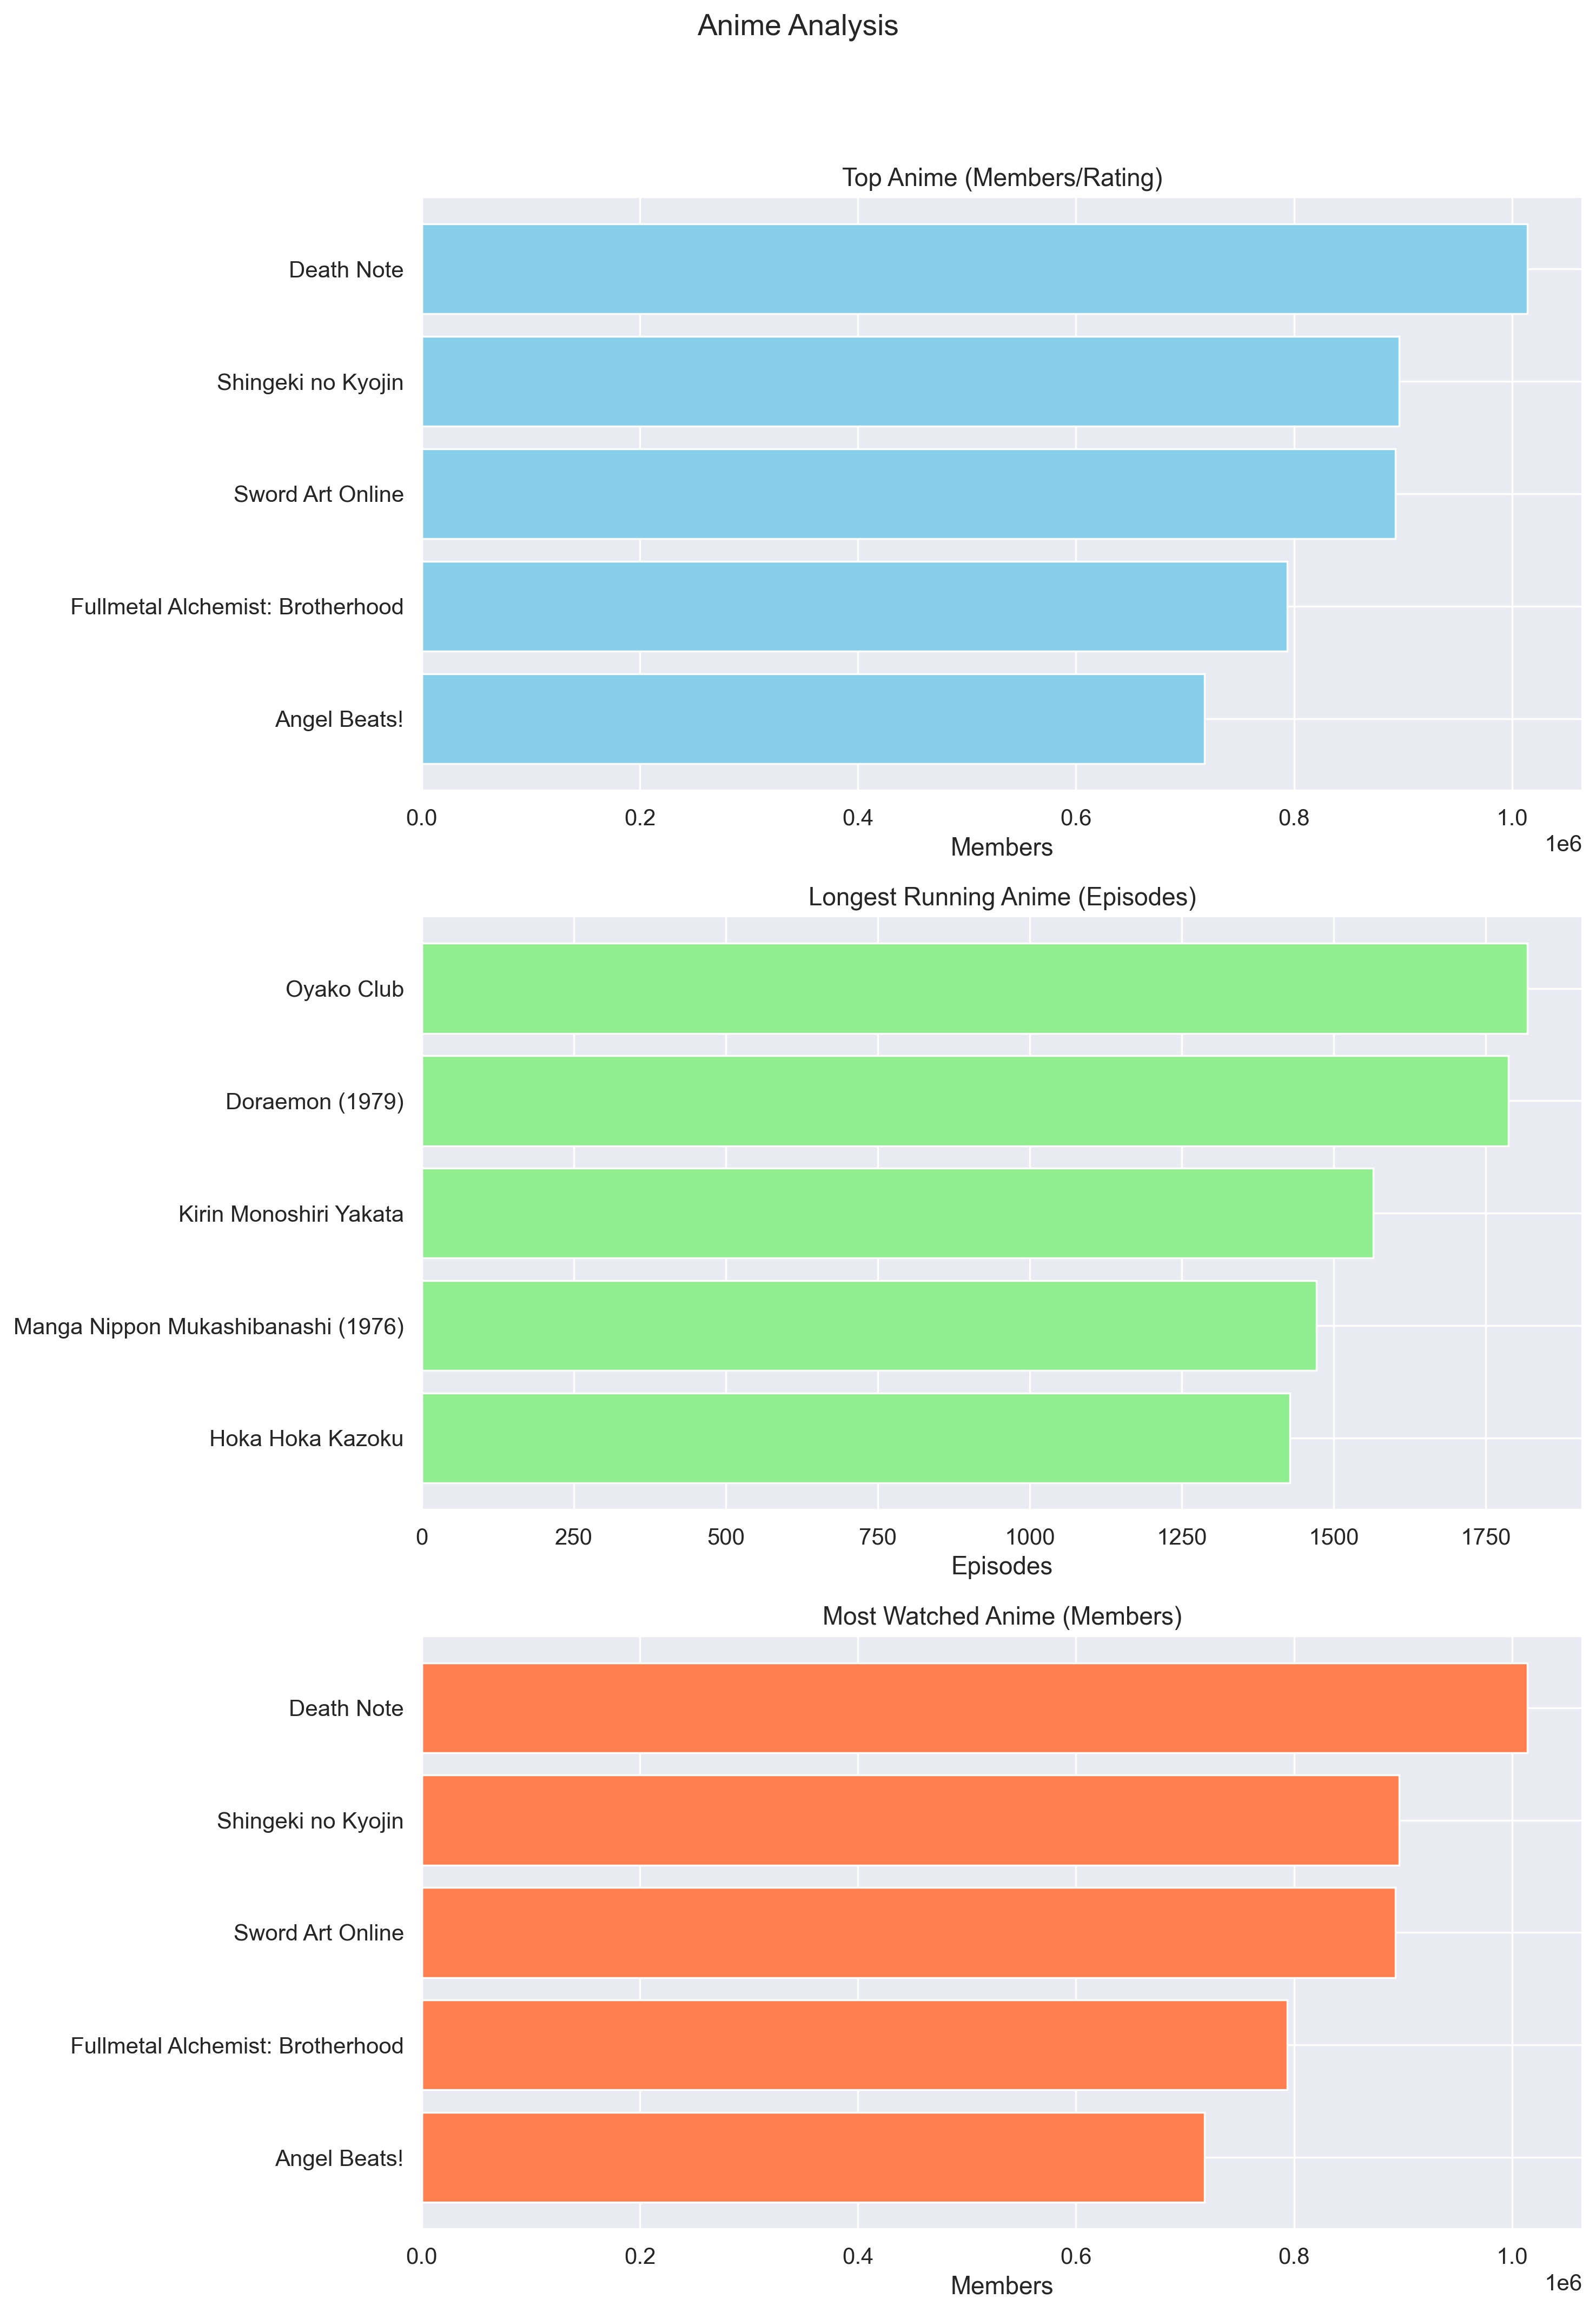

In [ ]:
# 1. Top Anime by Members/Rating
top_anime_members_rating = anime_dataset.sort_values(by=['members', 'rating'], ascending=False).head(5)

# 2. Longest Running Anime (by Episodes)

# setting the value of unknown episodes to -1
anime_dataset.loc[anime_dataset['episodes'] == 'Unknown', 'episodes'] = '-1'
# converting to integer type
anime_dataset['episodes'] = anime_dataset['episodes'].astype('int64')

longest_running_anime = anime_dataset.sort_values(by='episodes', ascending=False).head(5)
print(longest_running_anime)

# 3. Most Watched Anime (by Members)
most_watched_anime = anime_dataset.sort_values(by='members', ascending=False).head(5)

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle("Anime Analysis")

# Plot 1: Top Anime by Members/Rating
axs[0].barh(top_anime_members_rating['name'], top_anime_members_rating['members'], color='skyblue')
axs[0].set_title("Top Anime (Members/Rating)")
axs[0].set_xlabel("Members")
axs[0].invert_yaxis()  # Highest value on top

# Plot 2: Longest Running Anime (Episodes)
axs[1].barh(longest_running_anime['name'], longest_running_anime['episodes'], color='lightgreen')
axs[1].set_title("Longest Running Anime (Episodes)")
axs[1].set_xlabel("Episodes")
axs[1].invert_yaxis()  # Highest value on top

# Plot 3: Most Watched Anime (Members)
axs[2].barh(most_watched_anime['name'], most_watched_anime['members'], color='coral')
axs[2].set_title("Most Watched Anime (Members)")
axs[2].set_xlabel("Members")
axs[2].invert_yaxis()  # Highest value on top

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()